In [104]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import cv2 as cv
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [86]:
root_path = os.path.dirname(os.getcwd())
data_path = os.path.join(root_path, "brain_tumor_44_classes")

In [87]:
import splitfolders
splitfolders.ratio(data_path, output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 4479 files [00:05, 771.18 files/s]


In [88]:
train_generate = ImageDataGenerator(horizontal_flip=True,
                                    zoom_range=0.2,
                                    shear_range=0.2 , 
                                    rescale=1.0/255 )
train_set = train_generate.flow_from_directory("output/train/",
                                              target_size=(64, 64),
                                              class_mode='categorical',
                                               batch_size=32)
train_set_lables = train_set.classes

Found 3564 images belonging to 44 classes.


In [89]:
test_generate = ImageDataGenerator(rescale=1.0/255)
test_set = train_generate.flow_from_directory("output/test//",
                                              target_size=(64, 64),
                                              class_mode='categorical',
                                               batch_size=32)
test_set_lables = test_set.classes

Found 484 images belonging to 44 classes.


In [90]:
val_generate = ImageDataGenerator(rescale=1.0/255)
val_set = train_generate.flow_from_directory("output/val//",
                                              target_size=(64, 64),
                                              class_mode='categorical',
                                               batch_size=32)
val_set_lables = val_set.classes

Found 430 images belonging to 44 classes.


In [91]:
CNN=tf.keras.models.Sequential()

In [92]:
CNN.add(tf.keras.layers.Conv2D(filters=32,
                              kernel_size=(3,3),
                               activation="relu",
                               input_shape=[64,64,3]))

In [93]:
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                  strides=2))

In [94]:
CNN.add(tf.keras.layers.Conv2D(filters=32 ,
                              kernel_size=(3,3),
                               activation="relu",
                               input_shape=[64,64,3]))

In [95]:
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                  strides=2))

In [96]:
CNN.add(tf.keras.layers.Flatten())

In [97]:
CNN.add(tf.keras.layers.Dense(128, activation='relu'))
CNN.add(tf.keras.layers.Dense(44, activation='softmax'))

In [98]:
CNN.compile(optimizer="adam",loss="categorical_crossentropy" , metrics=["accuracy"])

In [99]:
history=CNN.fit(x=train_set ,
        epochs=27,validation_data=val_set)

Epoch 1/27
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.1097 - loss: 3.4304 - val_accuracy: 0.2512 - val_loss: 2.8033
Epoch 2/27
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.3145 - loss: 2.5824 - val_accuracy: 0.4372 - val_loss: 2.0975
Epoch 3/27
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.4773 - loss: 1.9801 - val_accuracy: 0.4535 - val_loss: 1.9556
Epoch 4/27
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.5601 - loss: 1.6105 - val_accuracy: 0.5163 - val_loss: 1.7669
Epoch 5/27
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.5785 - loss: 1.4391 - val_accuracy: 0.5465 - val_loss: 1.5878
Epoch 6/27
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6362 - loss: 1.2843 - val_accuracy: 0.5698 - val_loss: 1.5661
Epoch 7/27
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6657 - loss: 1.1714 - val_accuracy: 0.6116 - val_loss: 1.3842
Epoch 8/27
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.7196 - loss: 1.0002 - 

In [100]:
train_set.class_indices

{'Astrocitoma T1': 0,
 'Astrocitoma T1C+': 1,
 'Astrocitoma T2': 2,
 'Carcinoma T1': 3,
 'Carcinoma T1C+': 4,
 'Carcinoma T2': 5,
 'Ependimoma T1': 6,
 'Ependimoma T1C+': 7,
 'Ependimoma T2': 8,
 'Ganglioglioma T1': 9,
 'Ganglioglioma T1C+': 10,
 'Ganglioglioma T2': 11,
 'Germinoma T1': 12,
 'Germinoma T1C+': 13,
 'Germinoma T2': 14,
 'Glioblastoma T1': 15,
 'Glioblastoma T1C+': 16,
 'Glioblastoma T2': 17,
 'Granuloma T1': 18,
 'Granuloma T1C+': 19,
 'Granuloma T2': 20,
 'Meduloblastoma T1': 21,
 'Meduloblastoma T1C+': 22,
 'Meduloblastoma T2': 23,
 'Meningioma T1': 24,
 'Meningioma T1C+': 25,
 'Meningioma T2': 26,
 'Neurocitoma T1': 27,
 'Neurocitoma T1C+': 28,
 'Neurocitoma T2': 29,
 'Oligodendroglioma T1': 30,
 'Oligodendroglioma T1C+': 31,
 'Oligodendroglioma T2': 32,
 'Papiloma T1': 33,
 'Papiloma T1C+': 34,
 'Papiloma T2': 35,
 'Schwannoma T1': 36,
 'Schwannoma T1C+': 37,
 'Schwannoma T2': 38,
 'Tuberculoma T1': 39,
 'Tuberculoma T1C+': 40,
 'Tuberculoma T2': 41,
 '_NORMAL T1': 4

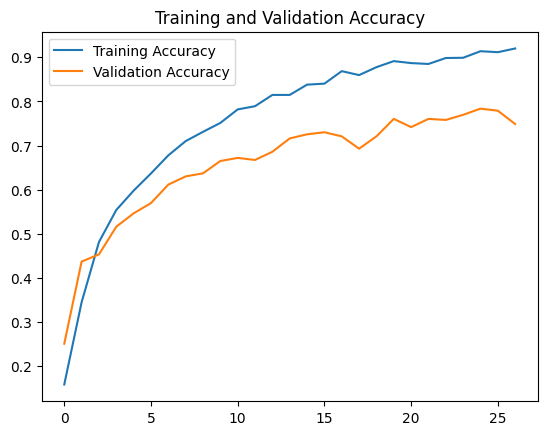

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot( acc, label='Training Accuracy')
plt.plot( val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(False)

In [109]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys()) 
accuaracy=history.history["accuracy"]
loss=history.history["loss"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

In [110]:
columns =["accuaracy","loss","val_loss","val_accuracy"]
data = [accuaracy , loss , val_loss ,val_accuracy]
data_frame = pd.DataFrame(data=data)
data_frame = data_frame.transpose()
data_frame.columns= columns
data_frame

,accuaracy,loss,val_loss,val_accuracy
0,0.158810,3.231386,2.803322,0.251163
1,0.345118,2.428246,2.097480,0.437209
2,0.481481,1.938079,1.955571,0.453488
3,0.554153,1.632646,1.766905,0.516279
4,0.597924,1.423900,1.587846,0.546512
5,0.636925,1.307733,1.566141,0.569767
6,0.677890,1.143236,1.384183,0.611628
7,0.710157,1.019654,1.397826,0.630233
8,0.731201,0.926881,1.310741,0.637209
9,0.751403,0.847032,1.250948,0.665116
